# **Car Price Prediction Multiple Linear Regression:**
Predicting the Prices of cars using RFE and VIF. Available at: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction/

## **About Dataset**

**1. Problem Statement:**

> A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

**2. Business Goal:**

> We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.**

# **Neural Network(DL) Regression on Car price**

![](https://miro.medium.com/v2/resize:fit:2160/format:webp/1*vUKwarc7rCouMzSt0Ksakw.jpeg)

## **Deep Learning for Regression** 🚀

### **1. Introduction** 🌟

Deep learning, a thrilling subfield of machine learning, has proven its mettle across various tasks, with regression being no exception. 🎯 Regression tasks involve predicting a continuous output variable, and deep learning models shine in capturing intricate relationships in the data, making them powerful wizards for regression analysis. 🧙‍♂️

**Key Components** 🧠

**Neural Networks**
Architecture: Deep learning models often embrace neural networks with multiple layers, akin to the intricate workings of the human brain. 🧠 Common architectures include feedforward neural networks and exciting variants like convolutional neural networks (CNNs) and recurrent neural networks (RNNs). 🌐💡


### **2. Activation Functions** ⚡

**Output Layer Activation** 🎯

For regression tasks, the output layer usually adopts the embrace of a linear activation function. This choice empowers the model to predict within a continuous range of values without imposing unnecessary constraints, offering flexibility and adaptability. 📈✨


### **3. Loss Functions** 📉

**Mean Squared Error** (MSE) 🔍

MSE stands tall as a common and trusted companion in the realm of regression problems. 🌐 This stalwart loss function meticulously quantifies the average squared disparity between the model's predictions and the ground truth, providing a nuanced gauge of performance. 🎯💡

## **I. Main Libraries:**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Use numpy to convert to arrays
import numpy as np
import seaborn as sns
# Import tools needed for visualization
import pydot
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

%matplotlib inline

## **II. Loading and Understanding the Raw Data:**

**Import the data**

In [ ]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**check for null values or missing data**


In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**check if some rows are duplicate entry meaning the entire row is an exact copy of any other row.**

In [ ]:
df.duplicated().sum()

0

**run common summary statistics on the dataset**

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe(percentiles=[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,0.999])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
0.1%,1.204000,-2.000000,86.600000,141.814000,60.606000,48.004000,1533.900000,62.836000,2.568560,2.094480,7.000000,48.816000,4150.000000,13.204000,16.000000,5124.732000
1%,3.040000,-1.960000,88.408000,144.816000,62.536000,48.824000,1819.720000,70.000000,2.910000,2.196800,7.000000,52.120000,4150.000000,14.040000,17.040000,5201.120000
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


**check for the value counts of the unique classes present in each category column**

In [ ]:
for x in df.select_dtypes(include=['object']).columns.tolist():
    print(df[x].value_counts(),'\n\n')

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64 


gas       185
diesel     20
Name: fueltype, dtype: int64 


std      168
turbo     37
Name: aspiration, dtype: int64 


four    115
two      90
Name: doornumber, dtype: int64 


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 


fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 


front    202
rear       3
Name: enginelocation, dtype: int64 


ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernum

In [ ]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


## **III. Exploratory Data Analysis (EDA):**

![](https://algorit.ma/wp-content/uploads/2019/05/Exploratory-Data-Analysis.png)

**function to create the histogram plots for all the numerical columns**

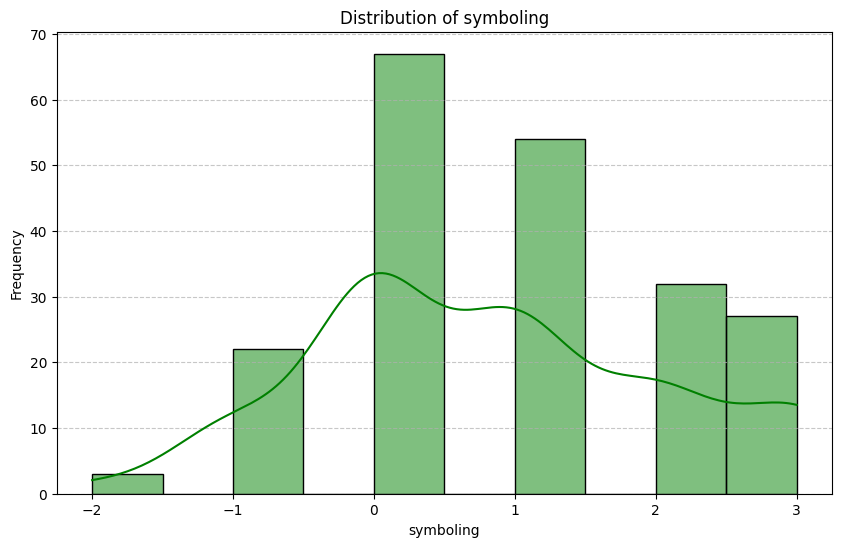

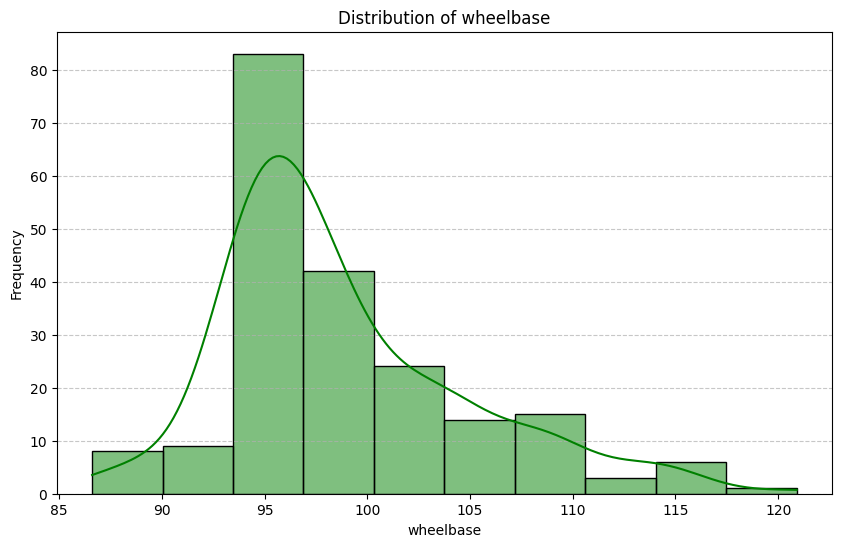

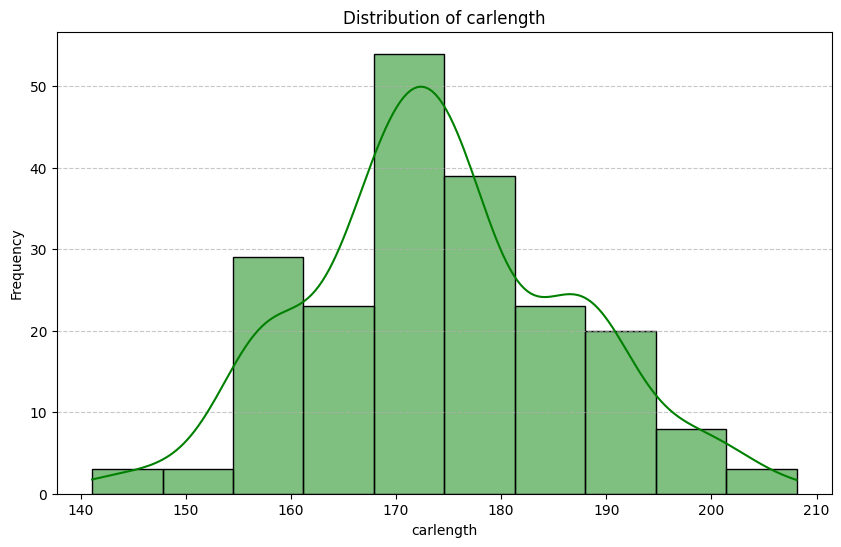

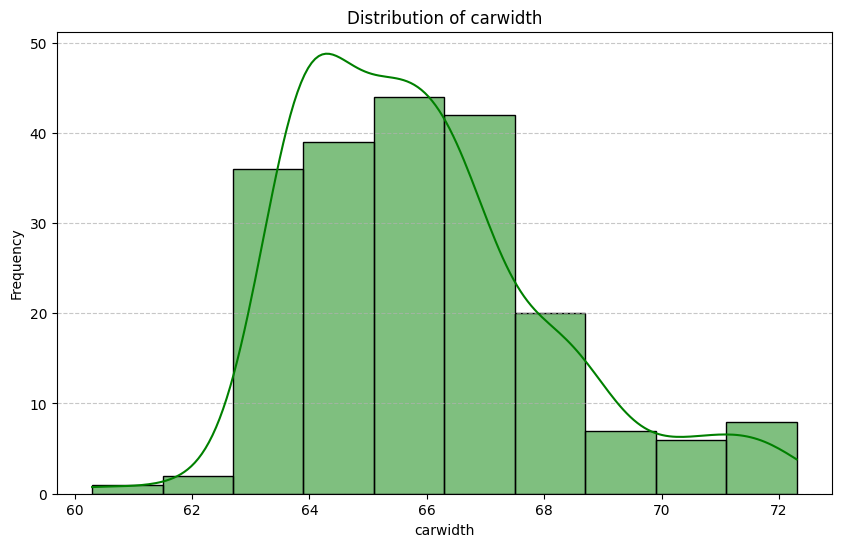

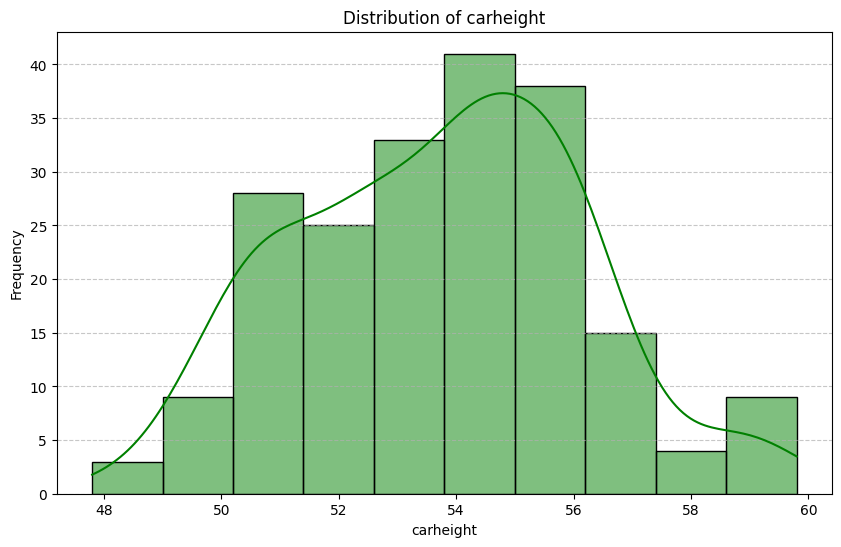

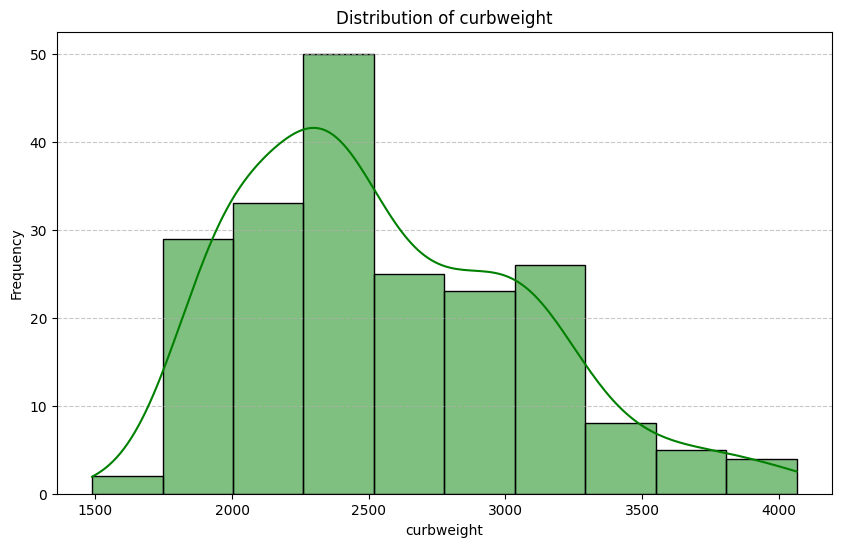

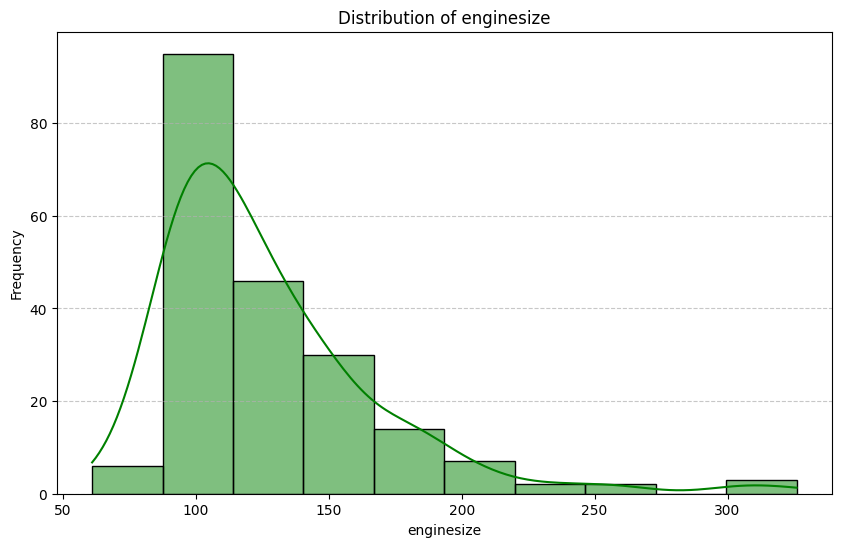

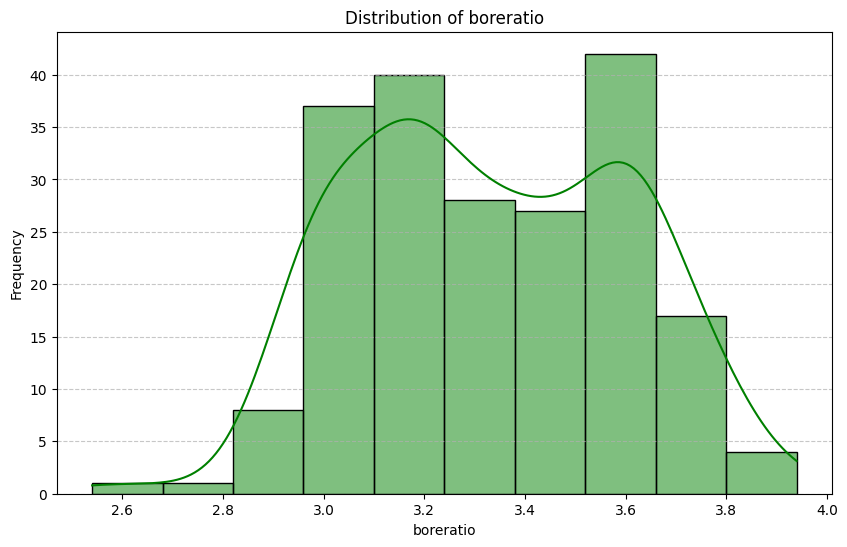

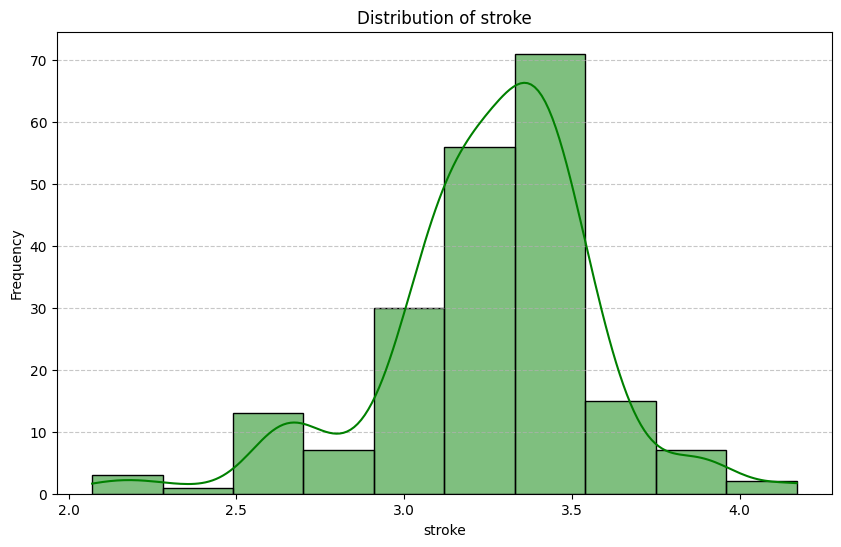

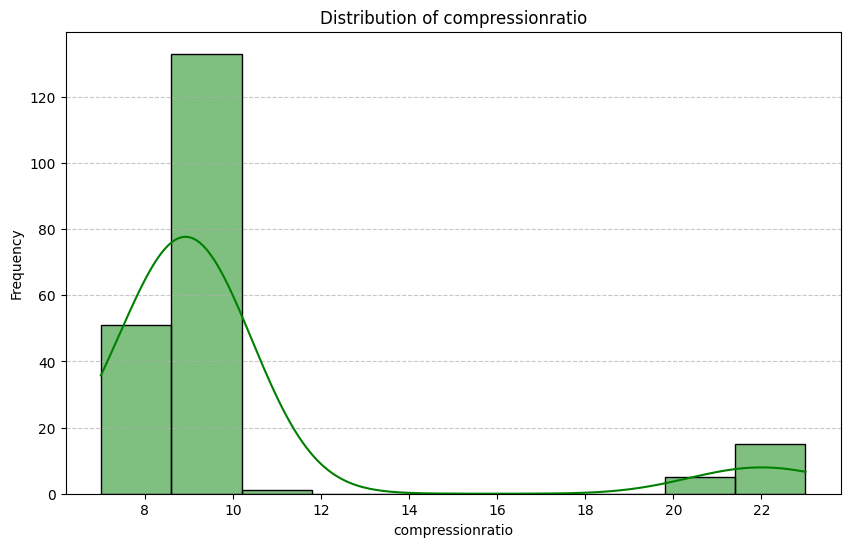

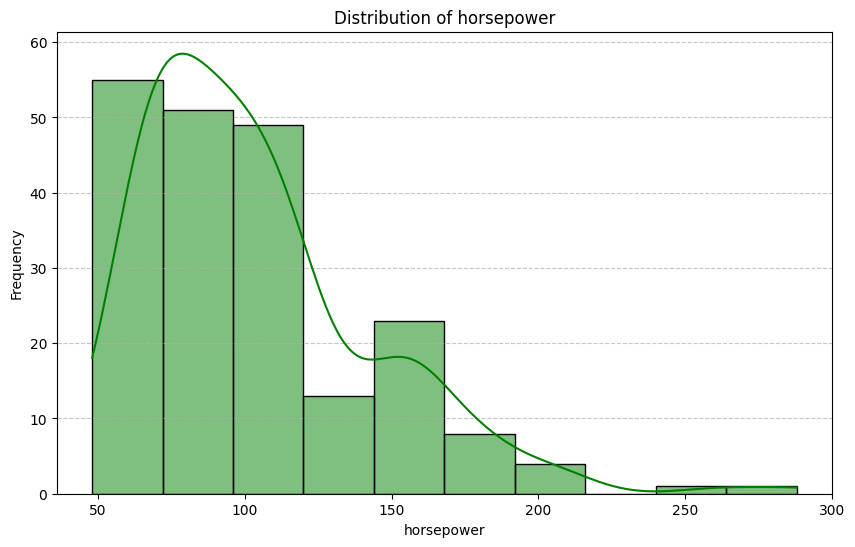

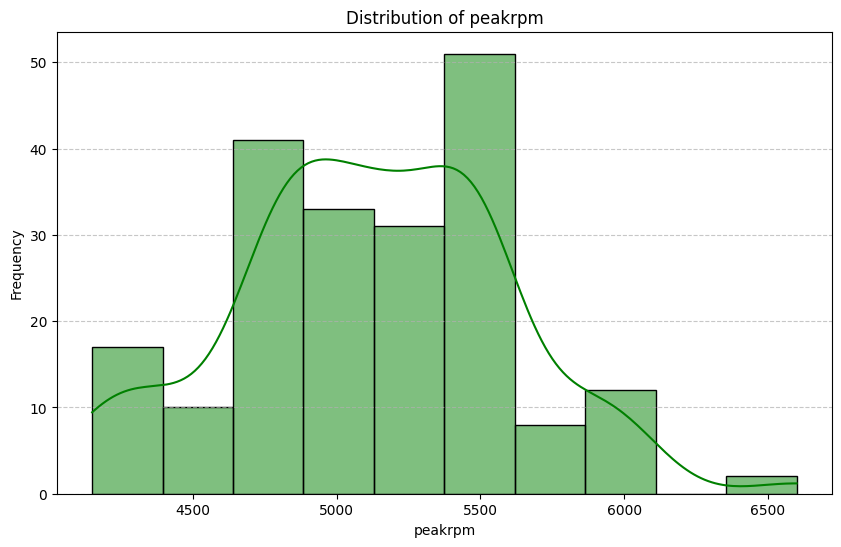

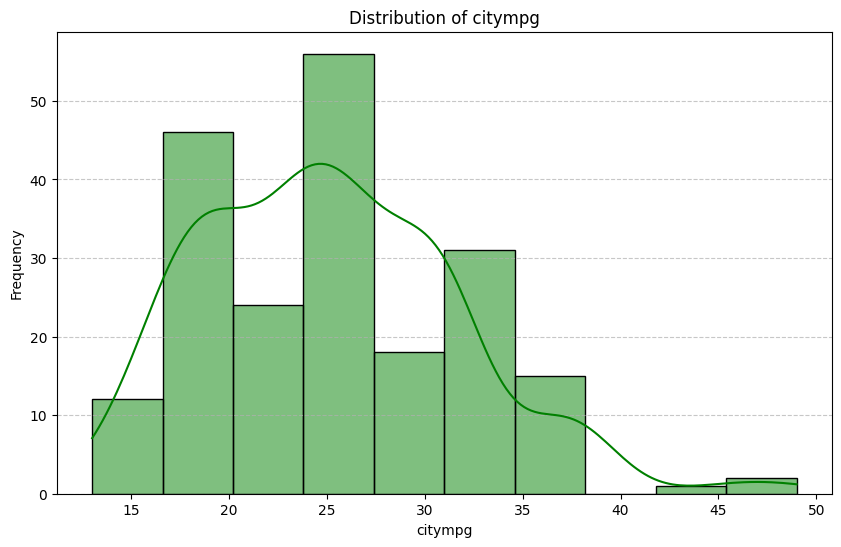

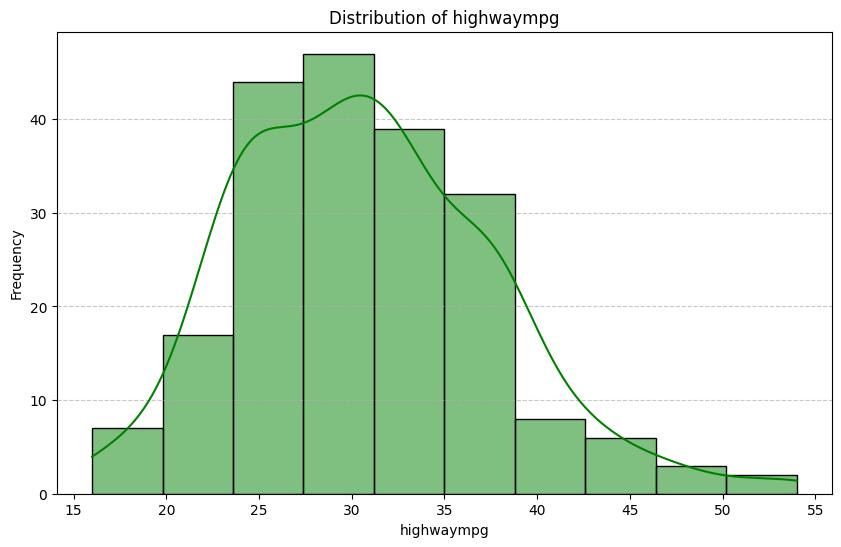

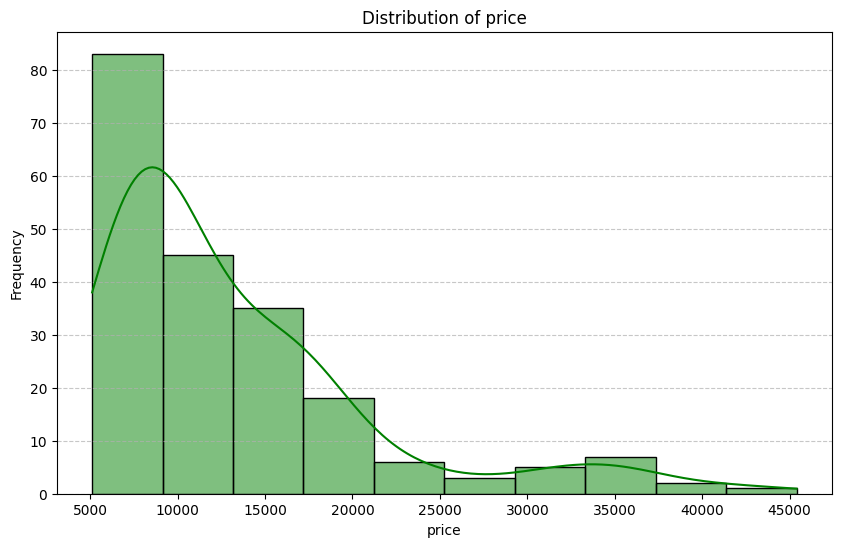

In [ ]:
# create a function to visualize the numerical columns
def histogram(column):
    # Set a pleasing color palette
    sns.set_palette("viridis")

    # Create a figure and axes
    plt.figure(figsize=(10, 6))

    # Plot the histogram with KDE
    sns.histplot(data=df[column], bins=10, kde=True, color='green', edgecolor='black')

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')

    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

for x in df.select_dtypes(include=['int64','float64']).columns.tolist()[1:]:
    histogram(x)

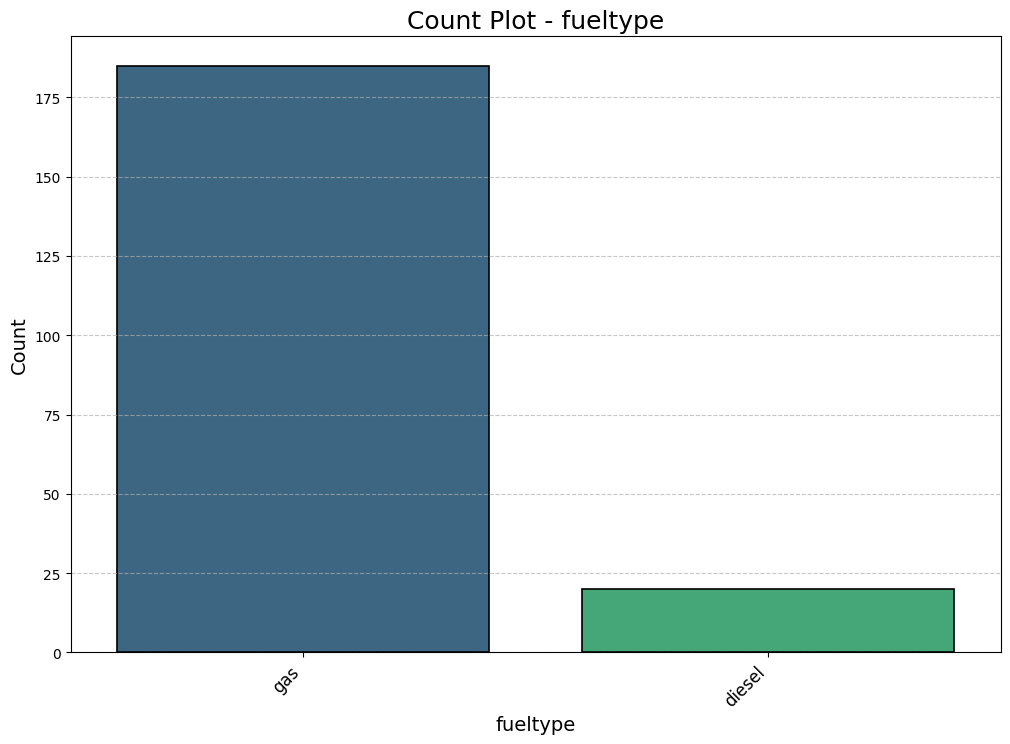

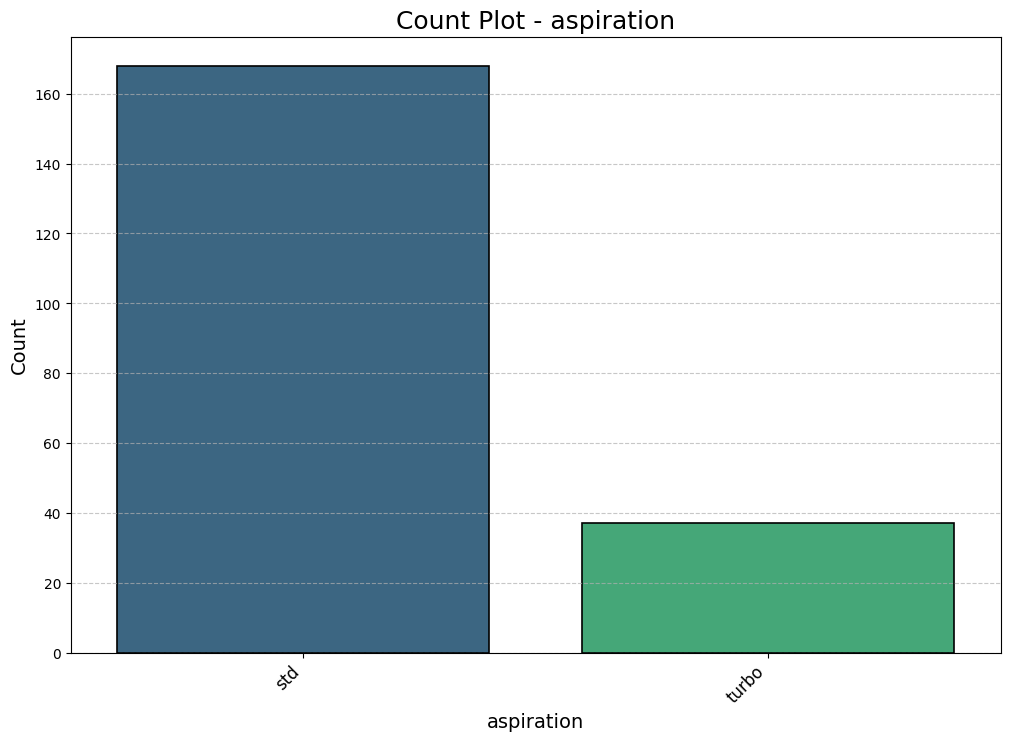

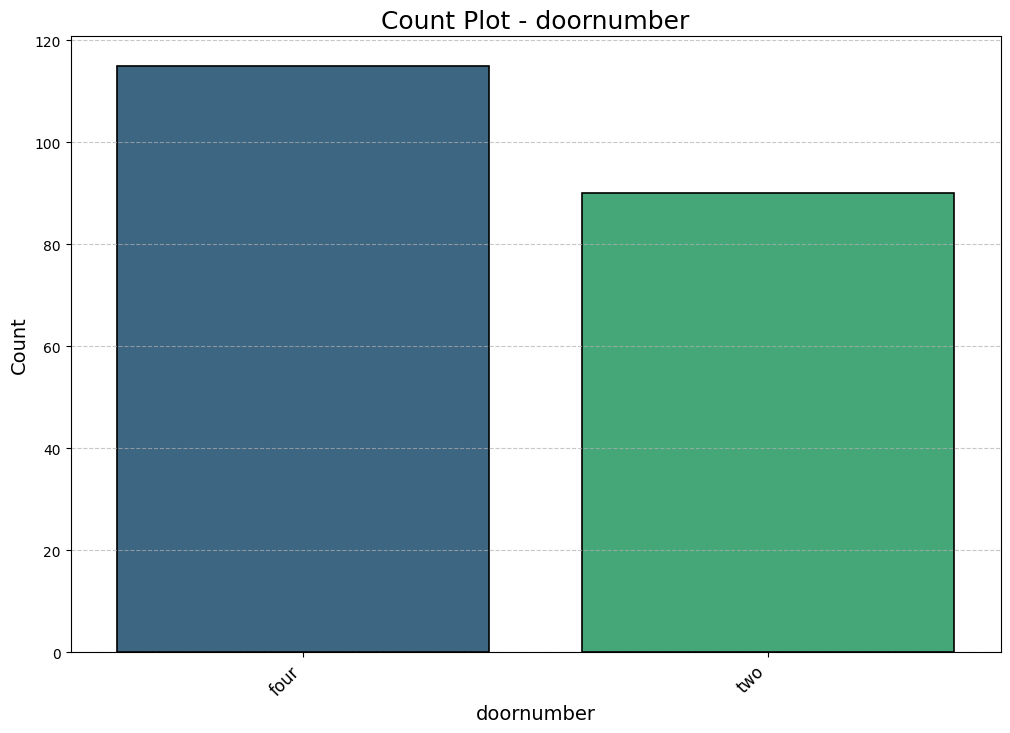

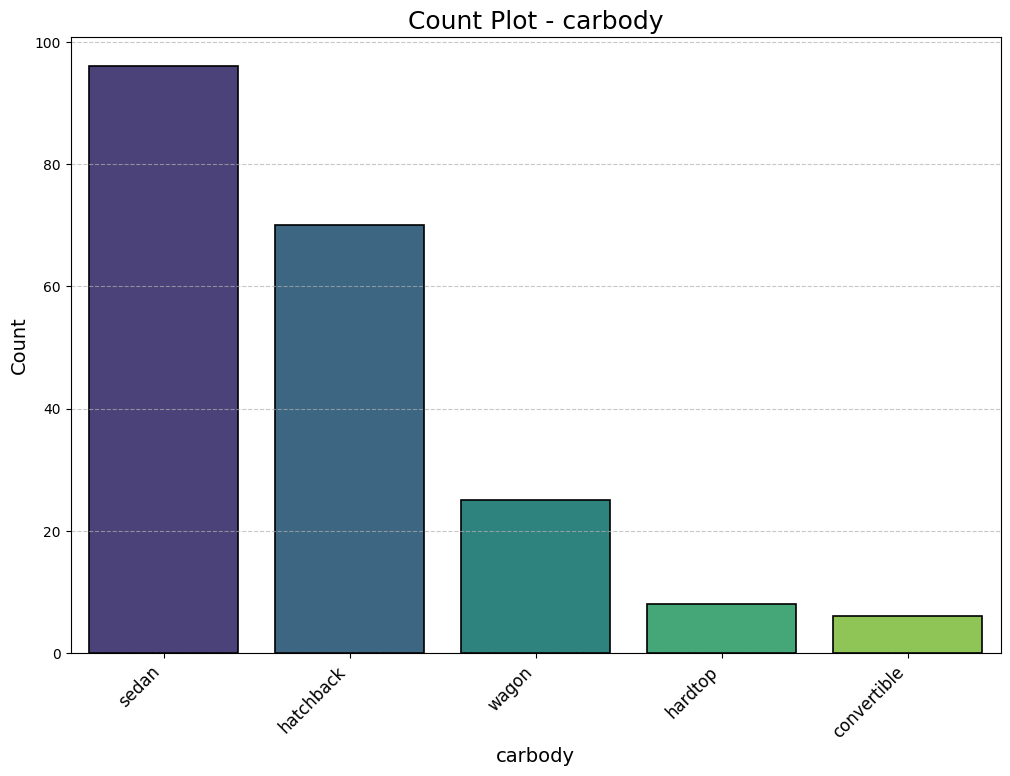

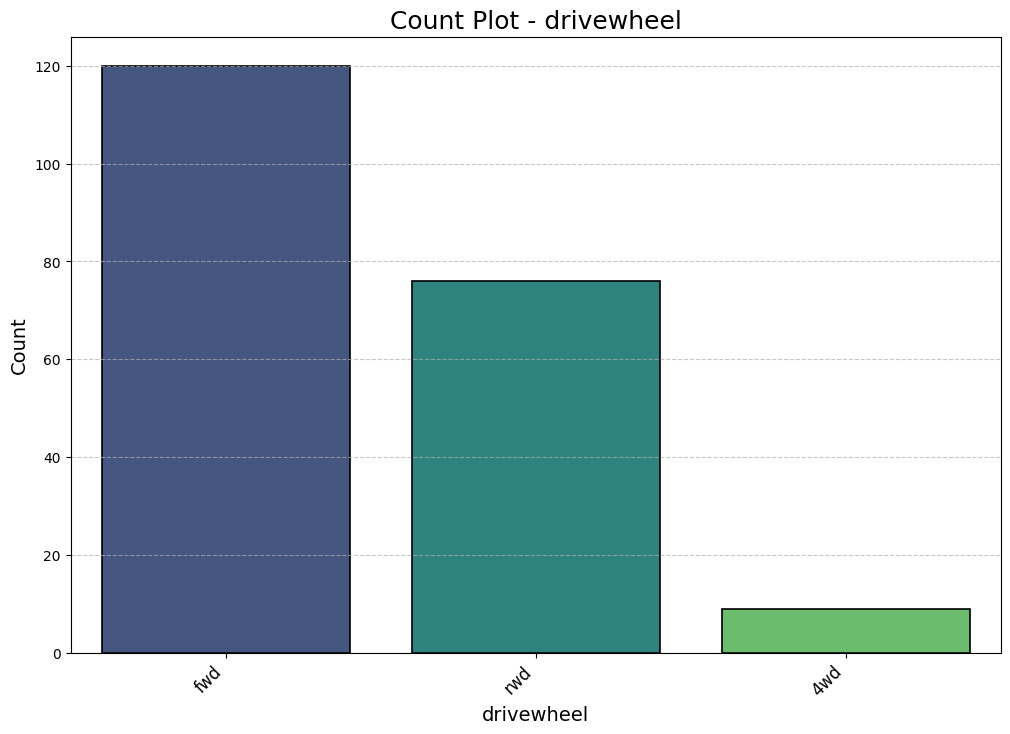

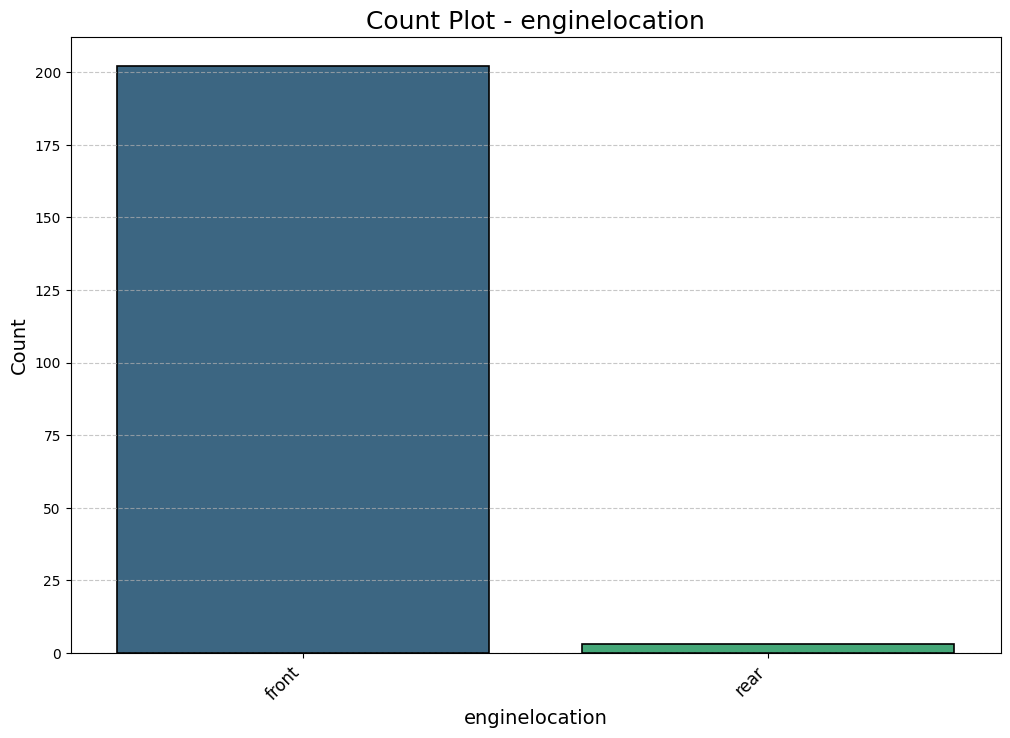

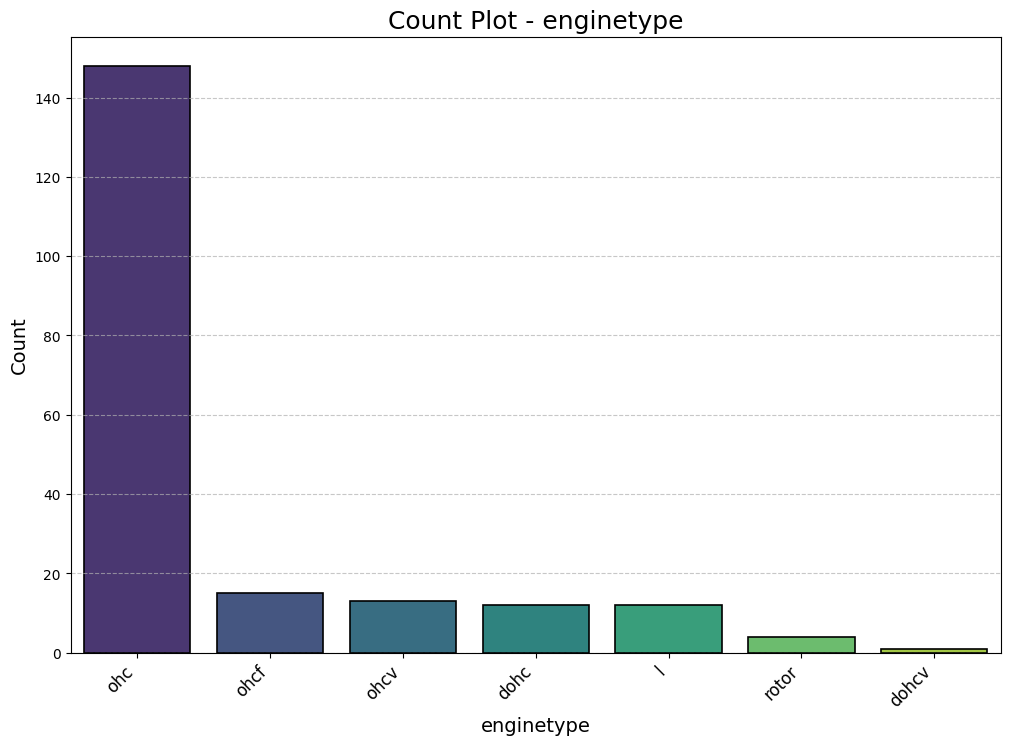

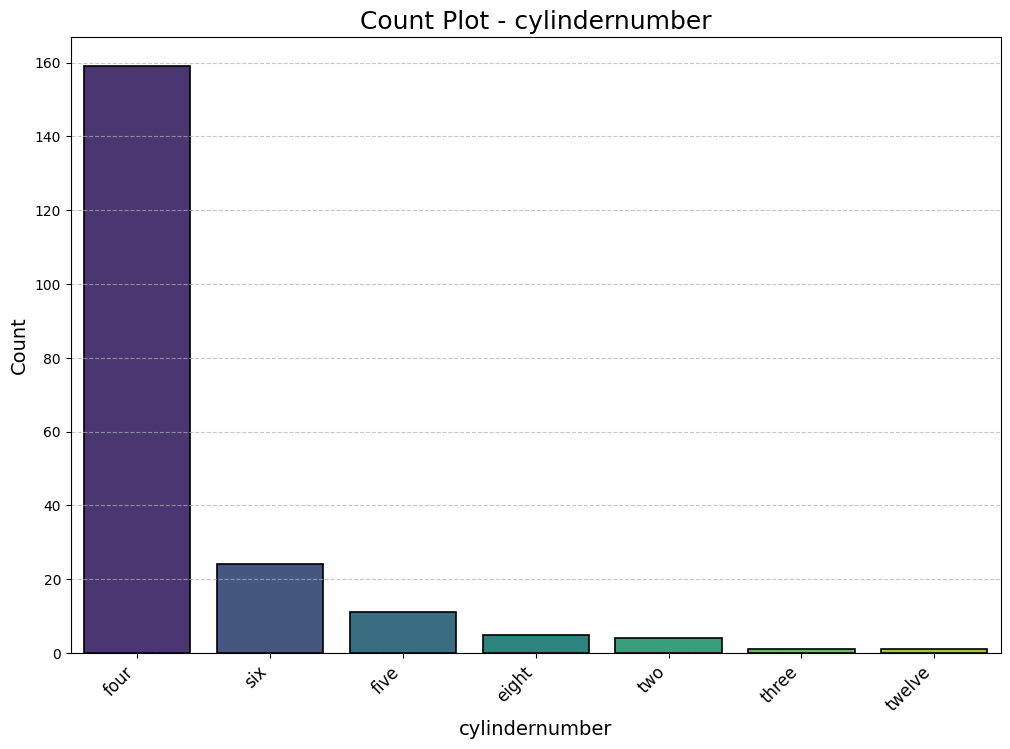

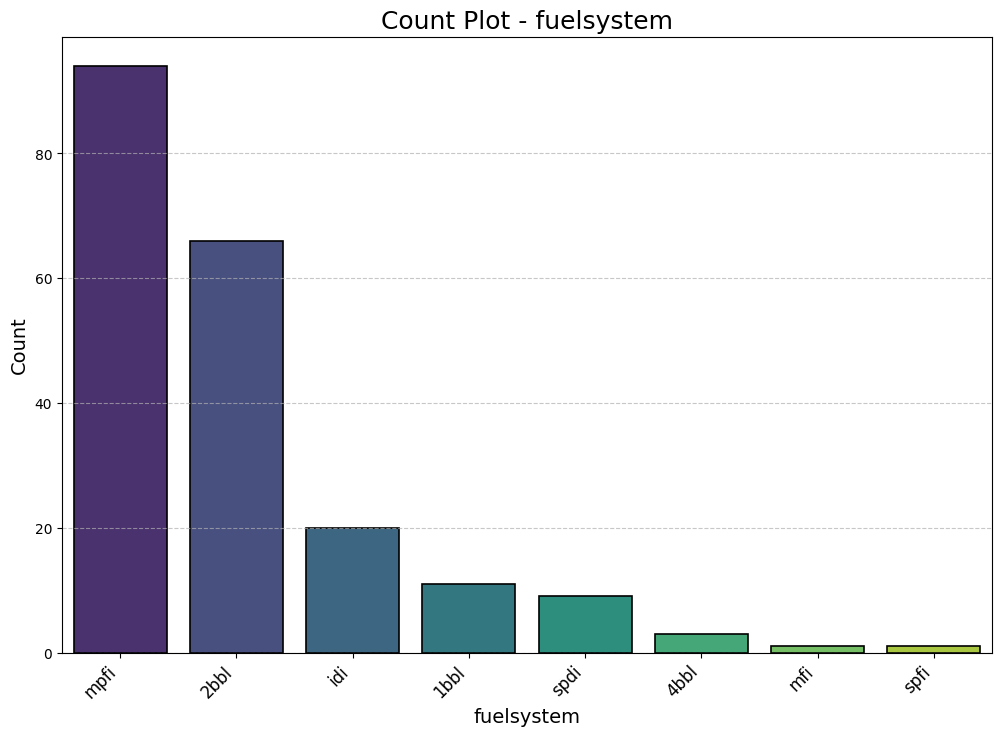

In [ ]:
# create a function to visualize the categrical columns
def count_plot(column):
    # Set a pleasing color palette
    sns.set_palette("Set2")

    # Create a figure and axes
    plt.figure(figsize=(12, 8))

    # Plot the count plot with adjusted bar width and edge color
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="viridis",
                  edgecolor='black', linewidth=1.2)

    # Add labels and title with increased font size
    plt.title(f'Count Plot - {column}', fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Rotate x-axis labels and adjust font size for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add a horizontal grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

for x in df.select_dtypes(include=['object']).columns.tolist()[1:]:
    count_plot(x)

**Our target variable is PRICE so we will visualise the relation of various features with the price column.**

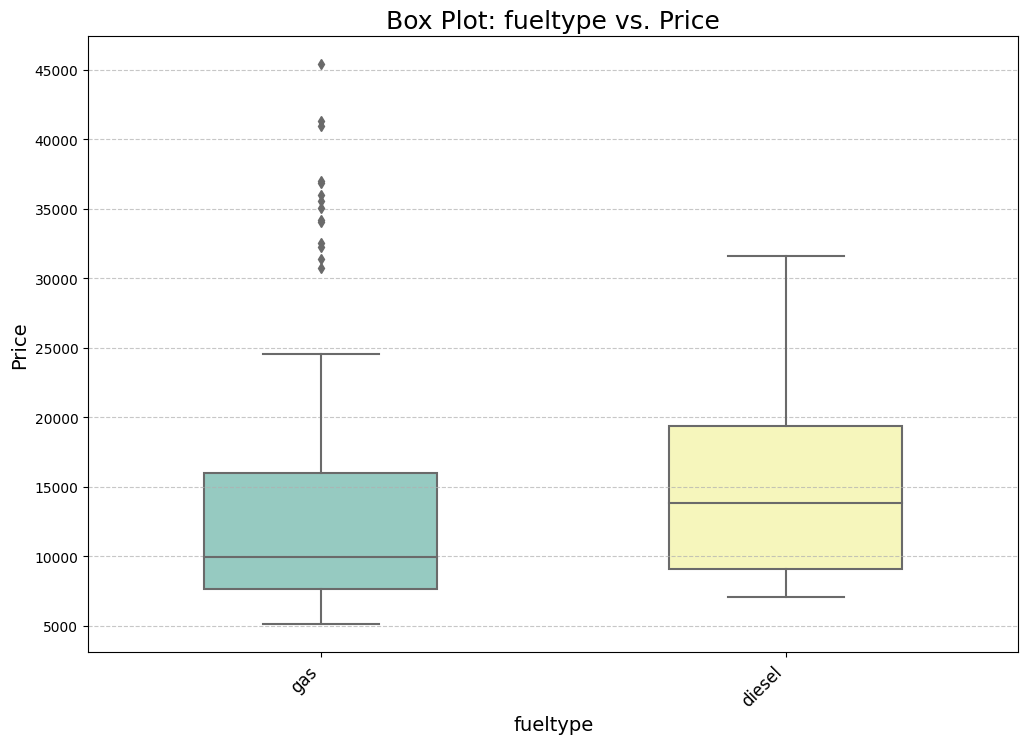

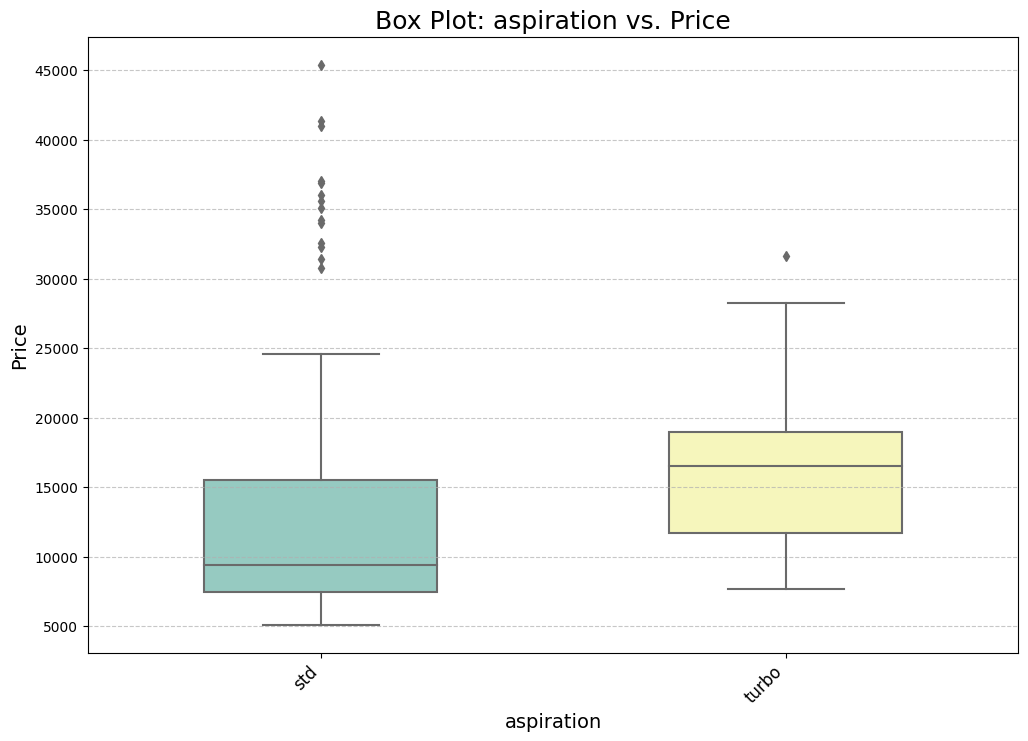

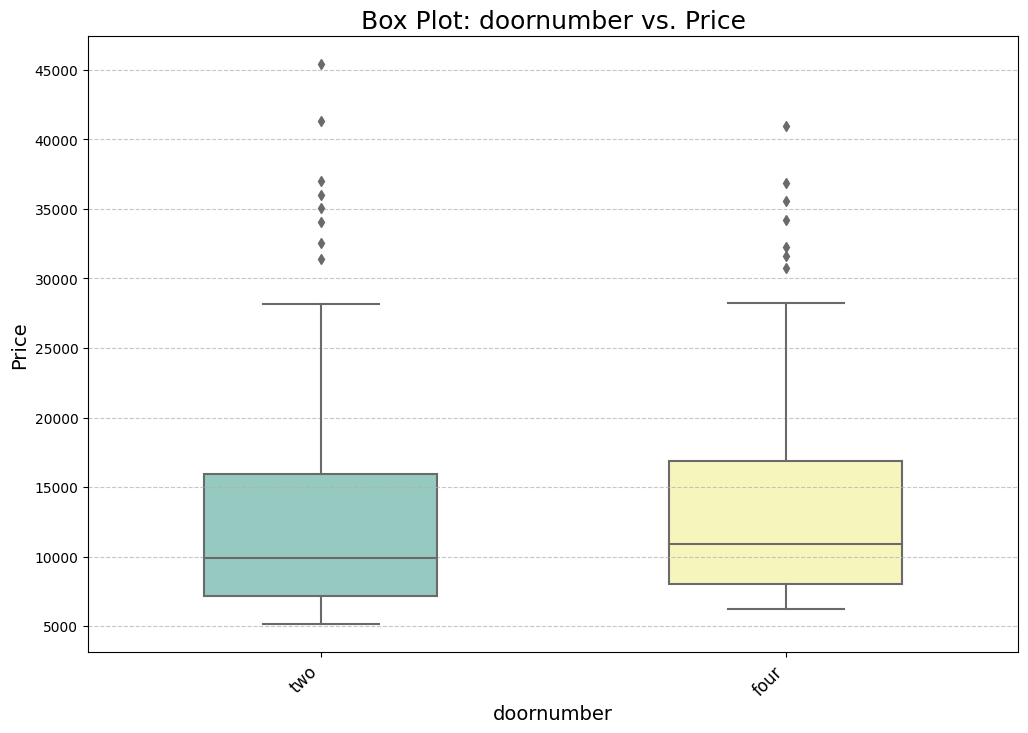

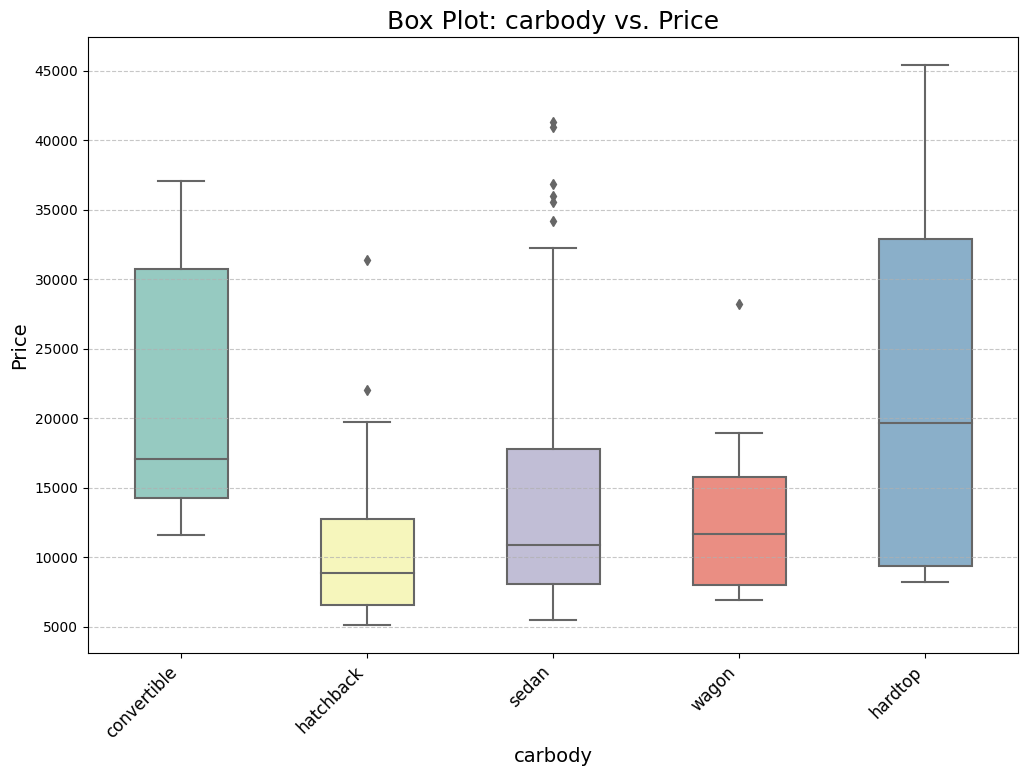

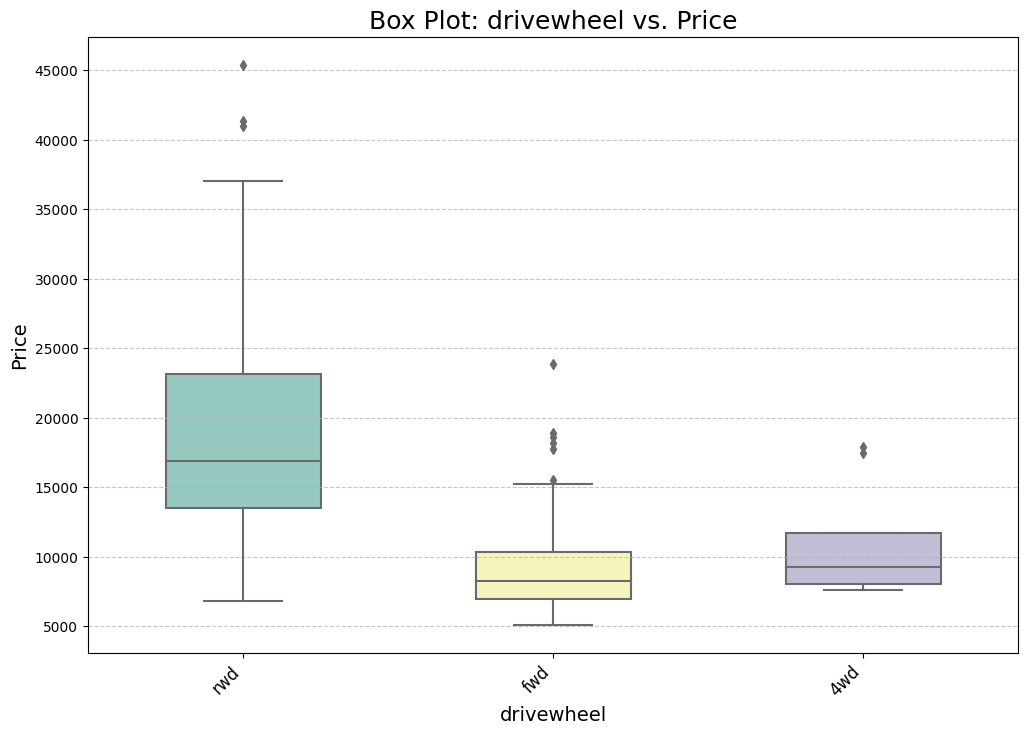

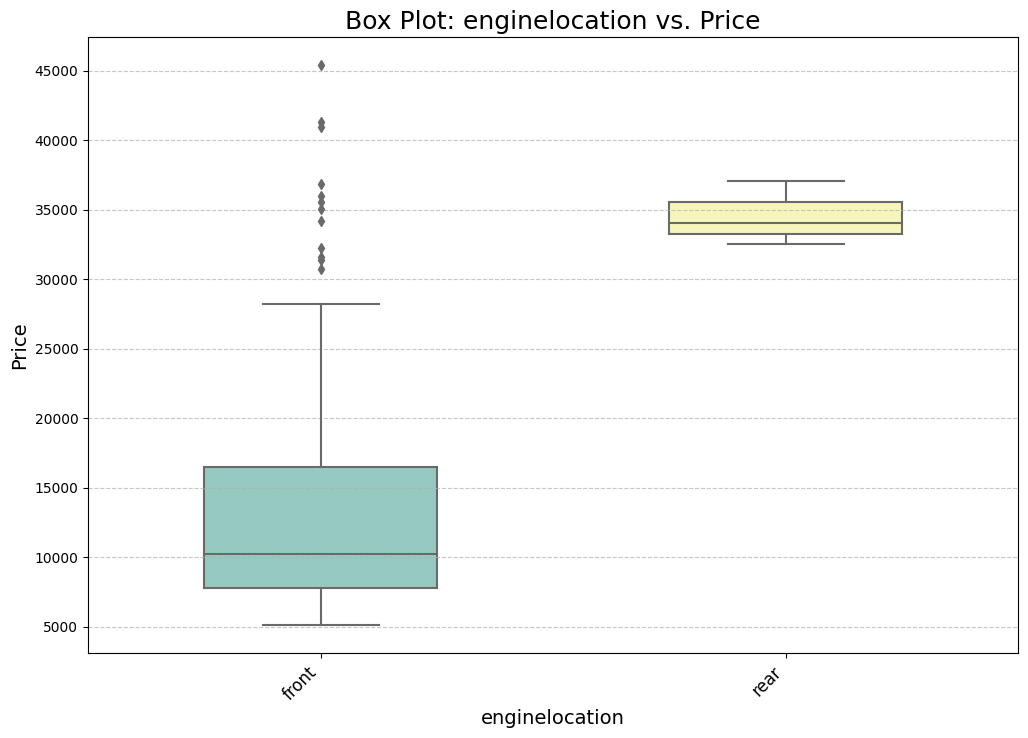

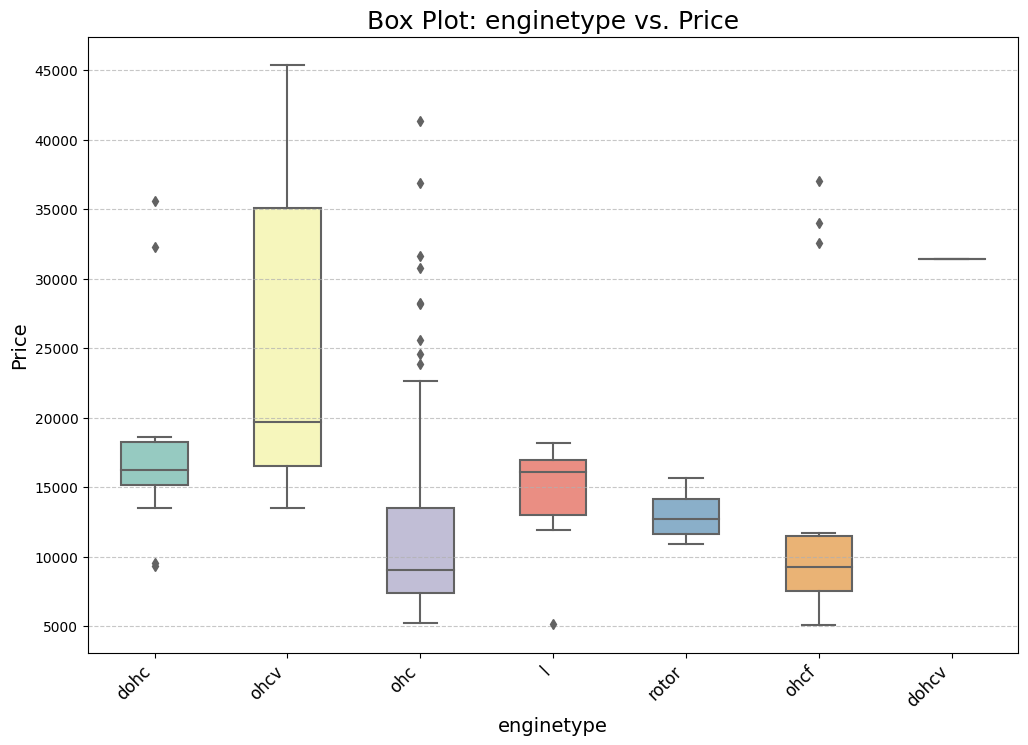

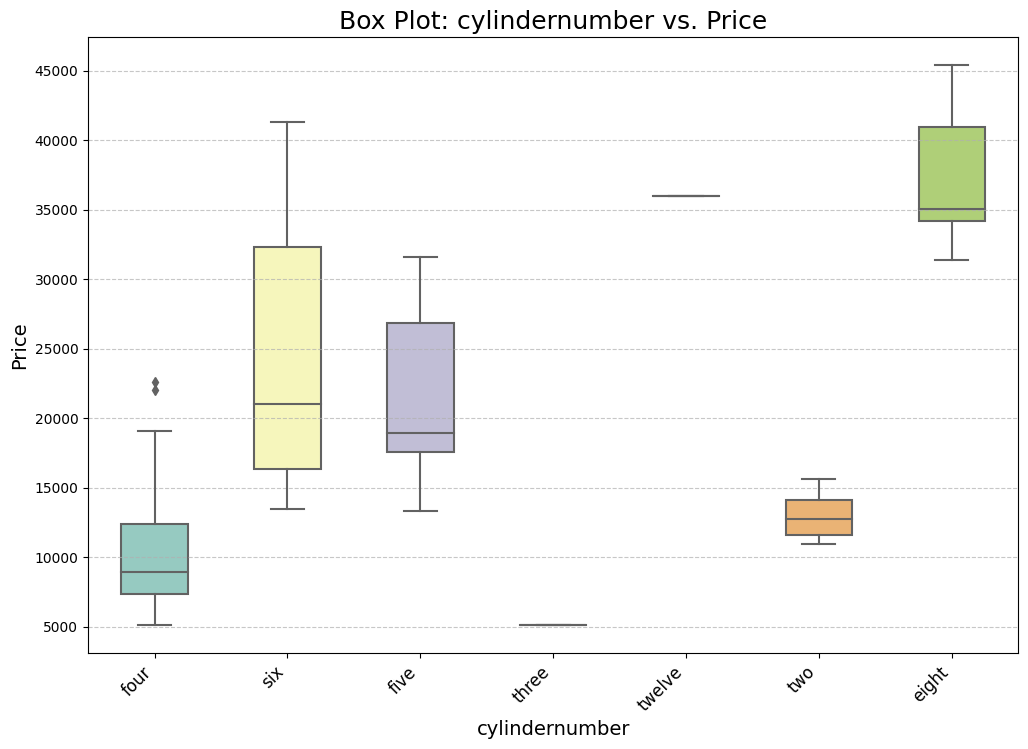

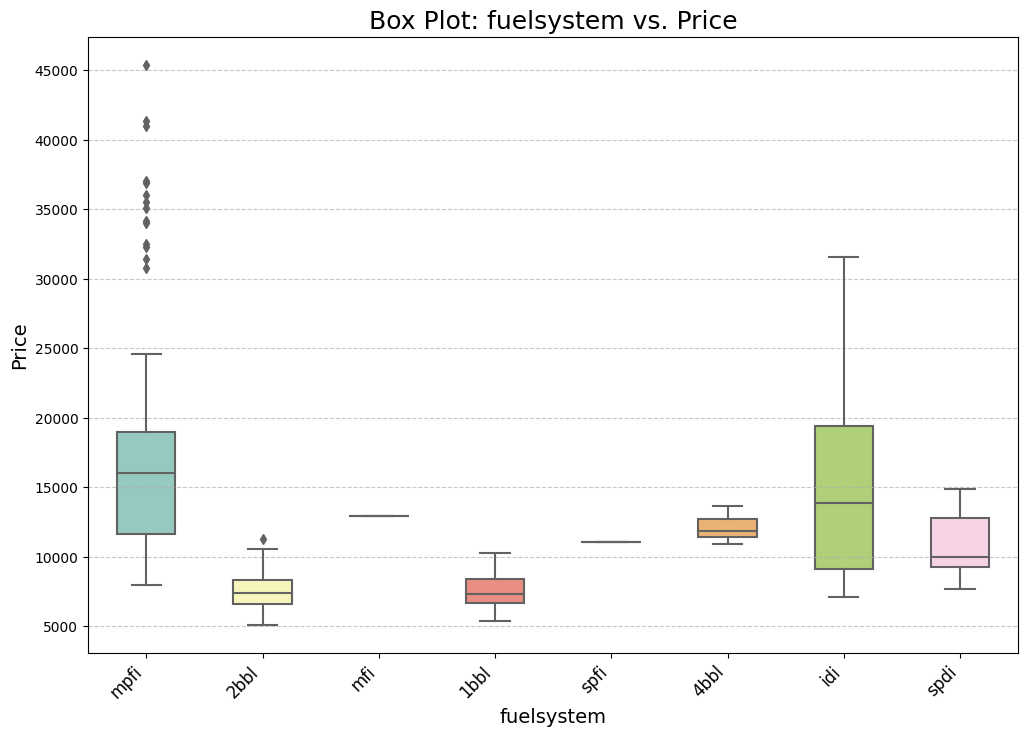

In [ ]:

def price_box_plot(column):
    # Set a pleasing color palette
    sns.set_palette("pastel")

    # Create a figure and axes
    plt.figure(figsize=(12, 8))

    # Plot the box plot with adjusted box width and whisker length
    sns.boxplot(x=column, y='price', data=df, width=0.5, fliersize=5, palette="Set3")

    # Add labels and title with increased font size
    plt.title(f'Box Plot: {column} vs. Price', fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Price', fontsize=14)

    # Rotate x-axis labels and adjust font size for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Add a horizontal grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

# Create box plots for each categorical column
for column in df.select_dtypes(include=['object']).columns.tolist()[1:]:
    price_box_plot(column)


## **IV. Feature/Data Engineering and Data Preprocessing:**

![](https://k21academy.com/wp-content/uploads/2022/04/Napa-Data-Engineering-Image.jpg)

In [ ]:
# see the unique values
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
# create a function to fix the CarName column
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()
# apply the clean_car_name function to the CarName column
df['CarName'] = df['CarName'].apply(clean_car_name)
# see the unique values after fixing
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# Fix typing mistakes
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')

In [ ]:
# see the unique values after fixing typing mistakes
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

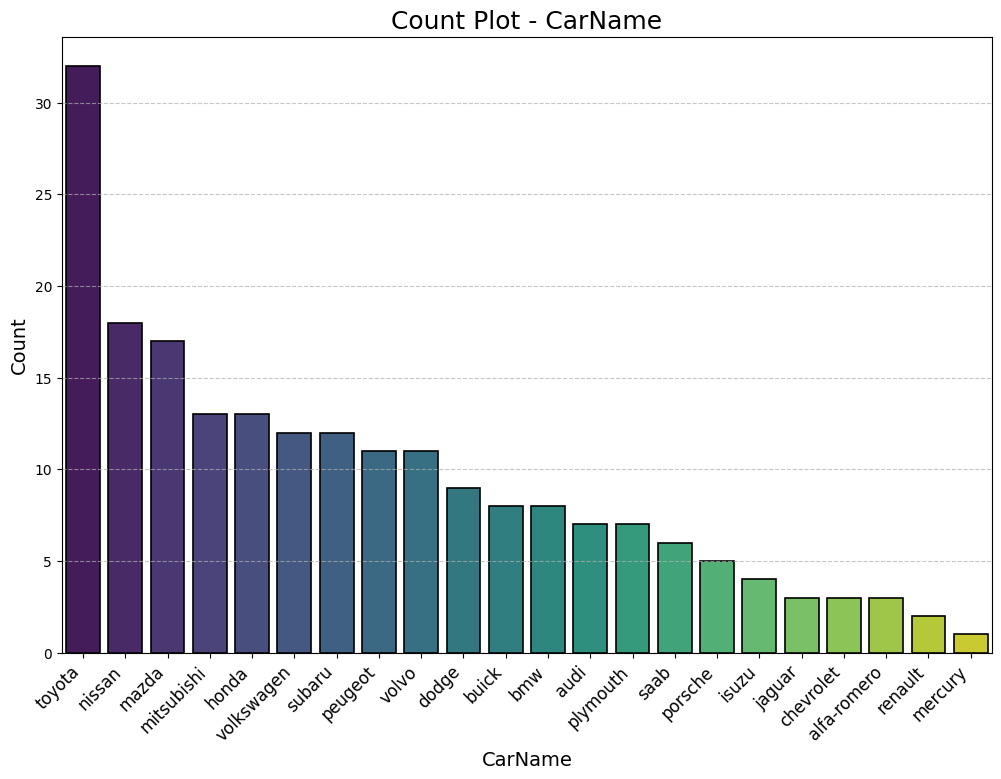

In [ ]:
count_plot('CarName')

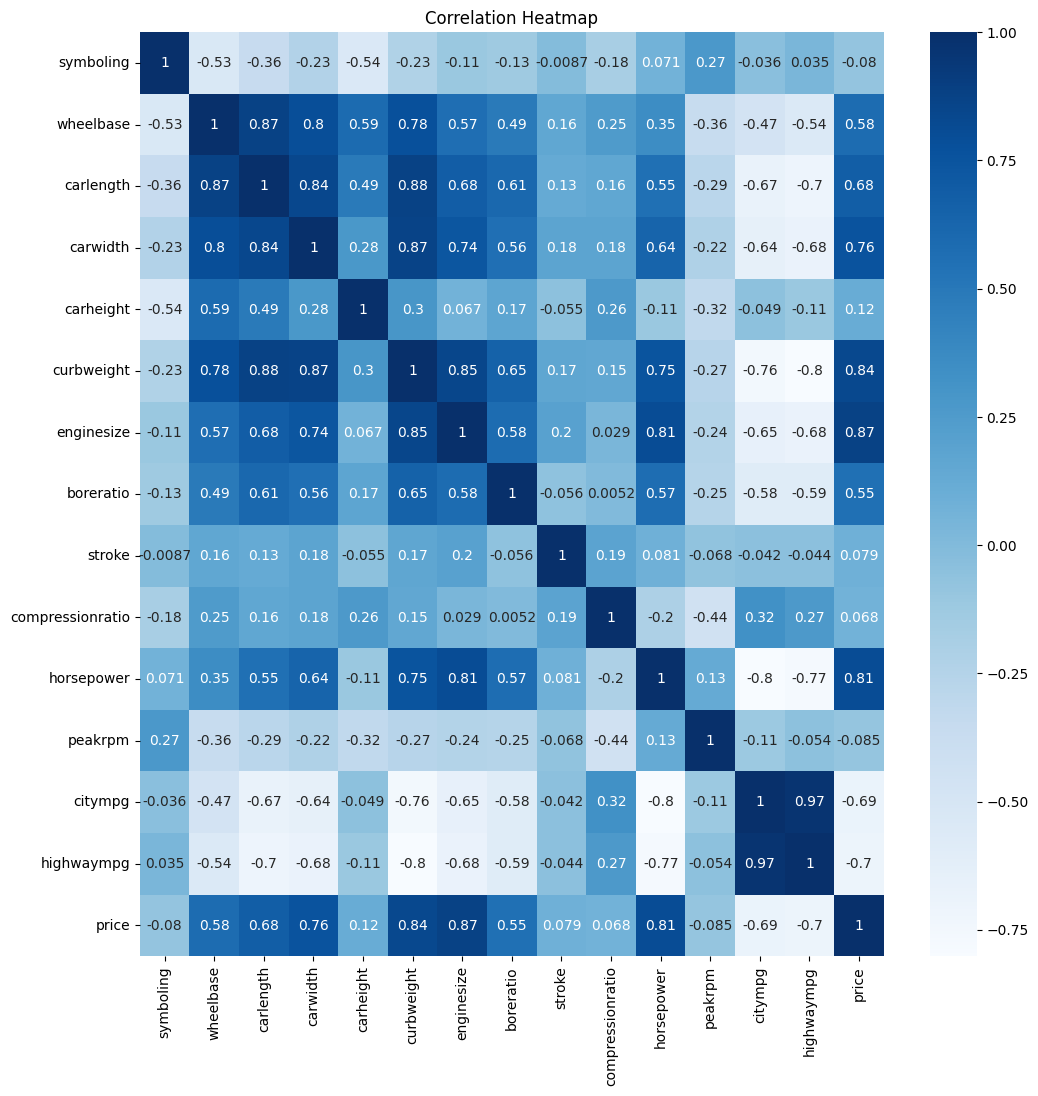

In [ ]:
correlation_matrix = df[df.select_dtypes(include=['int64','float64']).columns[1:]].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.drop('car_ID',axis=1,inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [ ]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns=numerical_columns[:-1]
print(numerical_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


**Gets X and Y from the dataset**

In [ ]:
X=df.iloc[:, :-1]
y=df['price']

print(X.head(),'\n\n','-='*30,'\n\n',y.head())

   symboling      CarName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  ...  cylindernumber  \
0        rwd          front       88.6      168.8  ...            four   
1        rwd          front       88.6      168.8  ...            four   
2        rwd          front       94.5      171.2  ...             six   
3        fwd          front       99.8      176.6  ...            four   
4        4wd          front       99.4      176.6  ...            five   

   enginesize  fuelsystem boreratio stroke  compressionratio horsepower  \
0         130        mpfi      3.47   2.6

![](https://daxg39y63pxwu.cloudfront.net/images/blog/data-preprocessing-techniques-and-steps/image_13091084341635516423259.png)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# X contains features, y contains target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create transformers for categorical and numerical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # Change StandardScaler to MinMaxScaler
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough'  # Include non-transformed columns
)

# Apply transformations to training, validation, and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the column names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()
column_names_after_transform = transformed_feature_names.tolist() + X.columns.difference(categorical_columns + numerical_columns).tolist()

# Check the preprocessed DataFrames
print(pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform).head())
print(pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform).head())

   cat__CarName_audi  cat__CarName_bmw  cat__CarName_buick  \
0                0.0               0.0                 0.0   
1                0.0               0.0                 0.0   
2                0.0               0.0                 0.0   
3                1.0               0.0                 0.0   
4                0.0               0.0                 0.0   

   cat__CarName_chevrolet  cat__CarName_dodge  cat__CarName_honda  \
0                     0.0                 0.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   

   cat__CarName_isuzu  cat__CarName_jaguar  cat__CarName_mazda  \
0                 0.0                  0.0                 0.0   
1                 0.0                  0.0                 0.0   
2             

In [ ]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed, columns=column_names_after_transform)
X_val_preprocessed=pd.DataFrame(X_val_preprocessed, columns=column_names_after_transform)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed, columns=column_names_after_transform)

X_train_preprocessed.head()

,cat__CarName_audi,cat__CarName_bmw,cat__CarName_buick,cat__CarName_chevrolet,cat__CarName_dodge,cat__CarName_honda,cat__CarName_isuzu,cat__CarName_jaguar,cat__CarName_mazda,cat__CarName_mercury,...,num__carheight,num__curbweight,num__enginesize,num__boreratio,num__stroke,num__compressionratio,num__horsepower,num__peakrpm,num__citympg,num__highwaympg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.558333,0.088117,0.128906,0.321429,0.666667,0.93125,0.012712,0.265306,1.00000,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.591667,0.225634,0.203125,0.550000,0.700000,0.10625,0.169492,0.020408,0.50000,0.529412
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.475000,0.091233,0.105469,0.435714,0.580952,0.15000,0.072034,0.428571,0.56250,0.617647
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.441667,0.306186,0.257812,0.464286,0.633333,0.09375,0.245763,0.551020,0.18750,0.264706
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.350000,0.320872,0.296875,0.771429,0.680952,0.14375,0.271186,0.265306,0.34375,0.411765


In [ ]:
#calculate the average price of the train dataset
mean_price = y_train.mean()
print("Average price :",mean_price)#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_price).mean())

Average price : 13367.35294117647


In [ ]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_price).mean())

MAE for Test Data: 5434.986425339366


![](https://i.ytimg.com/vi/IzcX9bTJLj8/maxresdefault.jpg)

🚀 **Designing the DNN - Step-by-Step Guide** 🚀

1. **Start Small 🌱:**
   - Begin with a modest architecture, perhaps with two layers.
   - Train the model and evaluate its performance on your data.
   - If it works well, you might have found a suitable model!

2. **Check for Success 🎉:**
   - If the smaller architecture succeeds, congratulations!
   - Your model might be capturing the essential patterns in the data.

3. **When Small Fails ☹️ - Go Bigger! 🚀:**
   - If the smaller model struggles or underperforms, consider increasing the size.
   - Add more layers or neurons to each layer.
   - This can enhance the model's capacity to learn complex patterns.

4. **Check Larger Networks 🏗️:**
   - Evaluate the performance of the larger model with two layers.
   - Sometimes, a bit more complexity is all you need.

5. **When Larger Two-Layers Fail 😞 - Go Deeper! 🔄:**
   - If the larger two-layer network still falls short, try going deeper.
   - Add more layers to the architecture.

6. **Check Larger and Deeper Networks 🏰:**
   - Evaluate the performance of the larger and deeper network.
   - Going deeper allows the model to capture intricate relationships.

7. **When Larger and Deeper Fail 😢 - Go Even Larger and Even Deeper! 🚀🔄:**
   - If everything else fails, be bold!
   - Increase both the size (more layers or neurons) and depth of the network.

8. **Check the Mighty Architecture 🚀🏰:**
   - Train and evaluate the mighty architecture you've created.
   - This approach might capture the most intricate patterns in your data.

9. **When All Else Fails 😫 - Revisit the Data 🔄:**
   - If, despite all efforts, the model performance is unsatisfactory, revisit your data.
   - Ensure your features are informative and the target variable is well-defined.
   - Consider collecting more data if possible.

10. **Optimize and Iterate 🔄🚀:**
    - Fine-tune hyperparameters and experiment with different architectures.
    - Iterate through these steps until you find the right balance between model complexity and data fit.

Remember, the key is to adapt and iterate based on the performance at each step. Happy modeling! 🚀🤖

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
input_dim = X_train_preprocessed.shape[1]

model = Sequential()
model.add(Dense(150, input_dim=input_dim, activation="relu"))
model.add(Dense(1, activation="linear"))

#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

#Train the model
history1=model.fit(X_train_preprocessed.values,y_train.values, validation_data=(X_val_preprocessed,y_val),epochs=10,batch_size=64)

Epoch 1/10
3/3 [==============================] - 2s 366ms/step - loss: 13367.5820 - mean_absolute_error: 13367.5820 - val_loss: 14620.5488 - val_mean_absolute_error: 14620.5488
Epoch 2/10
3/3 [==============================] - 0s 77ms/step - loss: 13367.2646 - mean_absolute_error: 13367.2646 - val_loss: 14620.2383 - val_mean_absolute_error: 14620.2383
Epoch 3/10
3/3 [==============================] - 0s 47ms/step - loss: 13366.9541 - mean_absolute_error: 13366.9541 - val_loss: 14619.9238 - val_mean_absolute_error: 14619.9238
Epoch 4/10
3/3 [==============================] - 0s 55ms/step - loss: 13366.6426 - mean_absolute_error: 13366.6426 - val_loss: 14619.6094 - val_mean_absolute_error: 14619.6094
Epoch 5/10
3/3 [==============================] - 0s 57ms/step - loss: 13366.3232 - mean_absolute_error: 13366.3232 - val_loss: 14619.2812 - val_mean_absolute_error: 14619.2812
Epoch 6/10
3/3 [==============================] - 0s 52ms/step - loss: 13365.9922 - mean_absolute_error: 13365.992

In [ ]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(X_test_preprocessed.values,y_test.values)

print(model.metrics_names,'\n\n')

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

1/1 [==============================] - 0s 449ms/step - loss: 11396.1348 - mean_absolute_error: 11396.1348
['loss', 'mean_absolute_error'] 


Metric  loss : 11396.13
Metric  mean_absolute_error : 11396.13


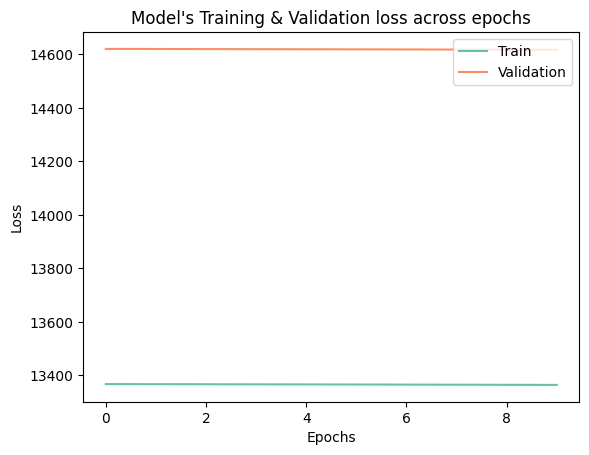

In [ ]:
# Plot training and validation loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

🔄 **Elevating the Model** 🚀

In the upgraded network, we've introduced two additional layers, each mirroring the neuron count of its predecessor. 🧠✨

To fine-tune our learning, we're making a switch in our loss function from Mean Absolute Error (MAE) to the more nuanced Mean Squared Error (MSE). This shift allows us to capture subtler variations and refines the model's ability to discern patterns within the data. 📊🔍

As we embark on this journey of enhancement, let's embrace the iterative nature of model improvement, seeking a delicate balance between complexity and performance. 🤖🛠️ Let the training begin! 🚀🔥

In [ ]:
# Define a learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.95  # Adjust the decay factor as needed

# Create the model
model = Sequential()
model.add(Dense(256, input_dim=input_dim, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mean_absolute_error"])

# Train the model with the learning rate scheduler
history = model.fit(X_train_preprocessed.values, y_train.values,
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=20, batch_size=64, callbacks=[LearningRateScheduler(lr_scheduler)])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/20
3/3 [==============================] - 2s 144ms/step - loss: 240744672.0000 - mean_absolute_error: 13367.2578 - val_loss: 308302112.0000 - val_mean_absolute_error: 14620.4443 - lr: 0.0010
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 240714560.0000 - mean_absolute_error: 13367.2793 - val_loss: 308299200.0000 - val_mean_absolute_error: 14620.4482 - lr: 0.0010
Epoch 3/20
3/3 [==============================] - 0s 32ms/step - loss: 240688288.0000 - mean_absolute_error: 13367.2617 - val_loss: 308295648.0000 - val_mean_absolute_error: 14620.4570 - lr: 0.0010
Epoch 4/20
3/3 [==============================] - 0s 25ms/step - loss: 240668240.0000 - mean_absolute_error: 13367.2490 - val_loss: 308291808.0000 - val_mean_absolute_error: 14620.4795 - lr: 0.0010
Epoch 5/20
3/3 [==============================] - 0s 26ms/step - loss: 240644608.0000 - mean_absolute_error: 13367.1973 - val_loss: 308287104.0000 - val_mean_absolute_error: 14620.5059 - lr: 0.0010
Epoch 6/2

In [ ]:
# Create a more complex model
model = Sequential()
model.add(Dense(512, input_dim=input_dim, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mean_absolute_error"])

# Define early stopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(X_train_preprocessed.values, y_train.values,
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=50, batch_size=64,
                    callbacks=[LearningRateScheduler(lr_scheduler), early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed.values, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/50
3/3 [==============================] - 6s 271ms/step - loss: 240747024.0000 - mean_absolute_error: 13367.3379 - val_loss: 308306592.0000 - val_mean_absolute_error: 14620.5732 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 0s 67ms/step - loss: 240735600.0000 - mean_absolute_error: 13367.3779 - val_loss: 308304736.0000 - val_mean_absolute_error: 14620.5713 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 0s 67ms/step - loss: 240708432.0000 - mean_absolute_error: 13367.1748 - val_loss: 308302496.0000 - val_mean_absolute_error: 14620.5664 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 79ms/step - loss: 240705424.0000 - mean_absolute_error: 13367.1904 - val_loss: 308300160.0000 - val_mean_absolute_error: 14620.5723 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 0s 55ms/step - loss: 240693488.0000 - mean_absolute_error: 13367.2578 - val_loss: 308297984.0000 - val_mean_absolute_error: 14620.6045 - lr: 0.0010
Epoch 6/5

In [ ]:
# Create a more complex model
model = Sequential()
model.add(Dense(512, input_dim=X_train_preprocessed.shape[1], activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation="linear"))

# Compile the model with a lower learning rate and L2 regularization
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

# Define early stopping to stop training if the validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(X_train_preprocessed, y_train,
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=100, batch_size=64,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

Epoch 1/100
3/3 [==============================] - 3s 146ms/step - loss: 240754928.0000 - mean_absolute_error: 13367.4082 - val_loss: 308309888.0000 - val_mean_absolute_error: 14620.6201
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 240749232.0000 - mean_absolute_error: 13367.2275 - val_loss: 308310048.0000 - val_mean_absolute_error: 14620.6318
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 240751200.0000 - mean_absolute_error: 13367.3418 - val_loss: 308310176.0000 - val_mean_absolute_error: 14620.6426
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 240746624.0000 - mean_absolute_error: 13367.2012 - val_loss: 308310240.0000 - val_mean_absolute_error: 14620.6523
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 240752768.0000 - mean_absolute_error: 13367.3350 - val_loss: 308310144.0000 - val_mean_absolute_error: 14620.6562
Epoch 6/100
3/3 [==============================] - 0s 27ms/step - los

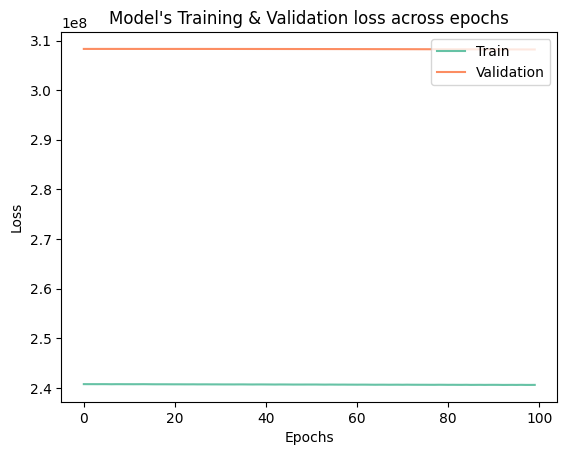

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is available after training the model

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

As we can see that we are not able to go any further even if increasing the complexity of the model.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Increase model complexity
model = Sequential()
model.add(Dense(512, input_dim=X_train_preprocessed.shape[1], activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

# Implement a learning rate schedule
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model with the learning rate schedule
model.compile(optimizer=optimizer,
              loss="mean_squared_error",
              metrics=["mean_absolute_error"])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_preprocessed, y_train,
                    validation_data=(X_val_preprocessed, y_val),
                    epochs=100, batch_size=64,
                    callbacks=[early_stopping])

# Use the model's evaluate method to predict and evaluate the test datasets
y_pred = model.predict(X_test_preprocessed.values)

# Calculate R²
r2 = r2_score(y_test.values, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.values, y_pred))

# Evaluate the model on the test set
result = model.evaluate(X_test_preprocessed, y_test)

# Print evaluation metrics
print('\n\n',model.metrics_names,'\n\n')
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i], ":", round(result[i], 2))

# Print R² and RMSE
print("R²:", round(r2, 2))
print("RMSE:", round(rmse, 2))

Epoch 1/100
3/3 [==============================] - 5s 573ms/step - loss: 240744816.0000 - mean_absolute_error: 13367.0332 - val_loss: 308269312.0000 - val_mean_absolute_error: 14619.2861
Epoch 2/100
3/3 [==============================] - 0s 112ms/step - loss: 240707888.0000 - mean_absolute_error: 13365.6475 - val_loss: 308208832.0000 - val_mean_absolute_error: 14617.2861
Epoch 3/100
3/3 [==============================] - 0s 103ms/step - loss: 240644960.0000 - mean_absolute_error: 13363.3174 - val_loss: 308104448.0000 - val_mean_absolute_error: 14613.8506
Epoch 4/100
3/3 [==============================] - 0s 152ms/step - loss: 240534496.0000 - mean_absolute_error: 13359.3350 - val_loss: 307924928.0000 - val_mean_absolute_error: 14607.9531
Epoch 5/100
3/3 [==============================] - 0s 64ms/step - loss: 240351568.0000 - mean_absolute_error: 13352.5742 - val_loss: 307627104.0000 - val_mean_absolute_error: 14598.1699
Epoch 6/100
3/3 [==============================] - 0s 91ms/step - 

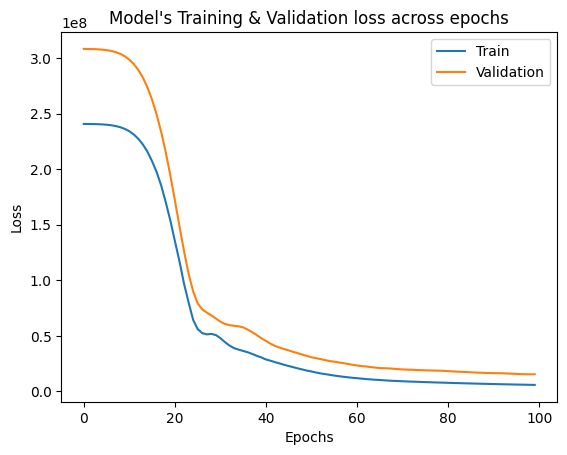

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()